## Week 2. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

###1번

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for thetaA ~ gamma(a,b)
aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

# prior parameters for thetaB ~ gamma(a,b)
aB = 12
bB = 1
priorB = st.gamma(aB, scale= 1/bB)

# data in group A and posterior distribution
# n=number of mice, sy=sum of their numbers
nA = 10
syA = 117
postA = st.gamma(aA+syA, scale=1/(bA+nA))

# data in group B and posterior distribution
# n=number of mice, sy=sum of their numbers
nB = 13
syB = 113
postB = st.gamma(aB+syB, scale=1/(bB+nB))

(a)

**Group A Bayesian Analysis**

In [2]:
# posterior mean (Group A)
(aA+syA)/(bA+nA)

11.85

In [3]:
# posterior mode (Group A)
(aA+syA-1)/(bA+nA)

11.8

In [4]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, aA+syA, scale=1/(bA+nA))
ubA=gamma.ppf(0.975, aA+syA, scale=1/(bA+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

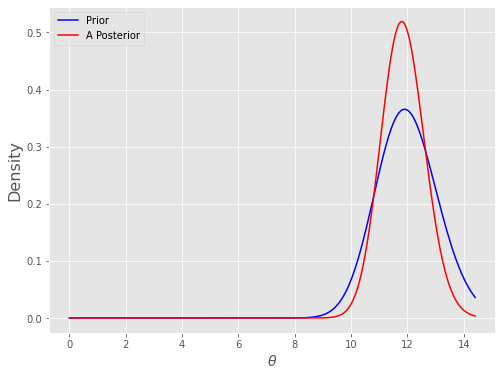

In [8]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
#plt.plot(thetas, (10**31)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Group B Bayesian Analysis**

In [9]:
# posterior mean (Group B)
(aB+syB)/(bB+nB)

8.928571428571429

In [10]:
# posterior mode (Group B)
(aB+syB-1)/(bB+nB)

8.857142857142858

In [11]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, aB+syB, scale=1/(bB+nB))
ubB=gamma.ppf(0.975, aB+syB, scale=1/(bB+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

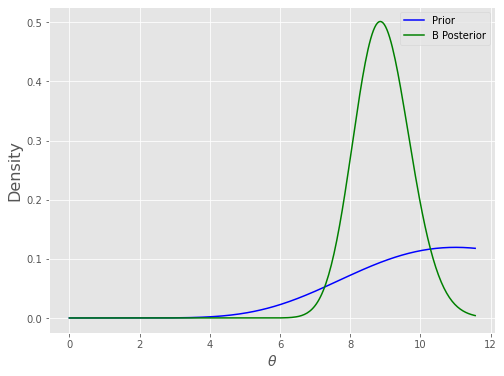

In [12]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorB.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
#plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Comparing Two Posterior Distributions**

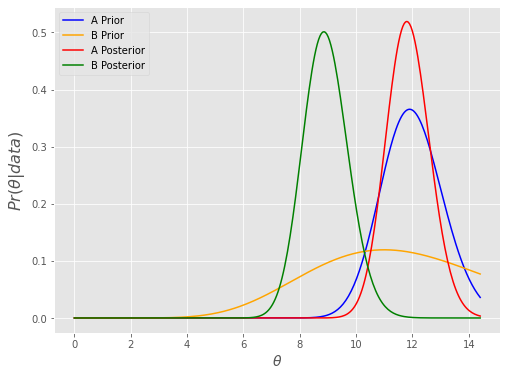

In [13]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, priorB.pdf(thetas), label='B Prior', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

(b)

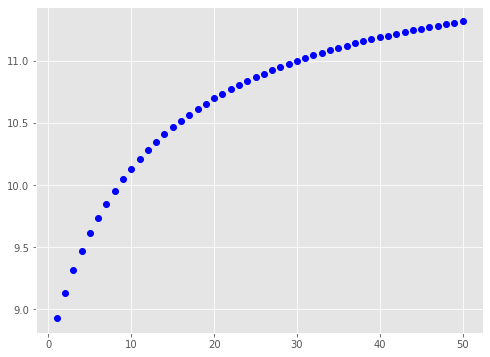

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
for n0 in range(1, 51):
    mu = (aB*n0+syB)/(bB*n0+nB)
    plt.plot(n0, mu, marker = 'o', c = 'blue')

n0가 커질수록 $\theta_A$의 poeterior mean에 가까워짐. (11.85)

즉 데이터가 많아야 함.??

(c)



###2번

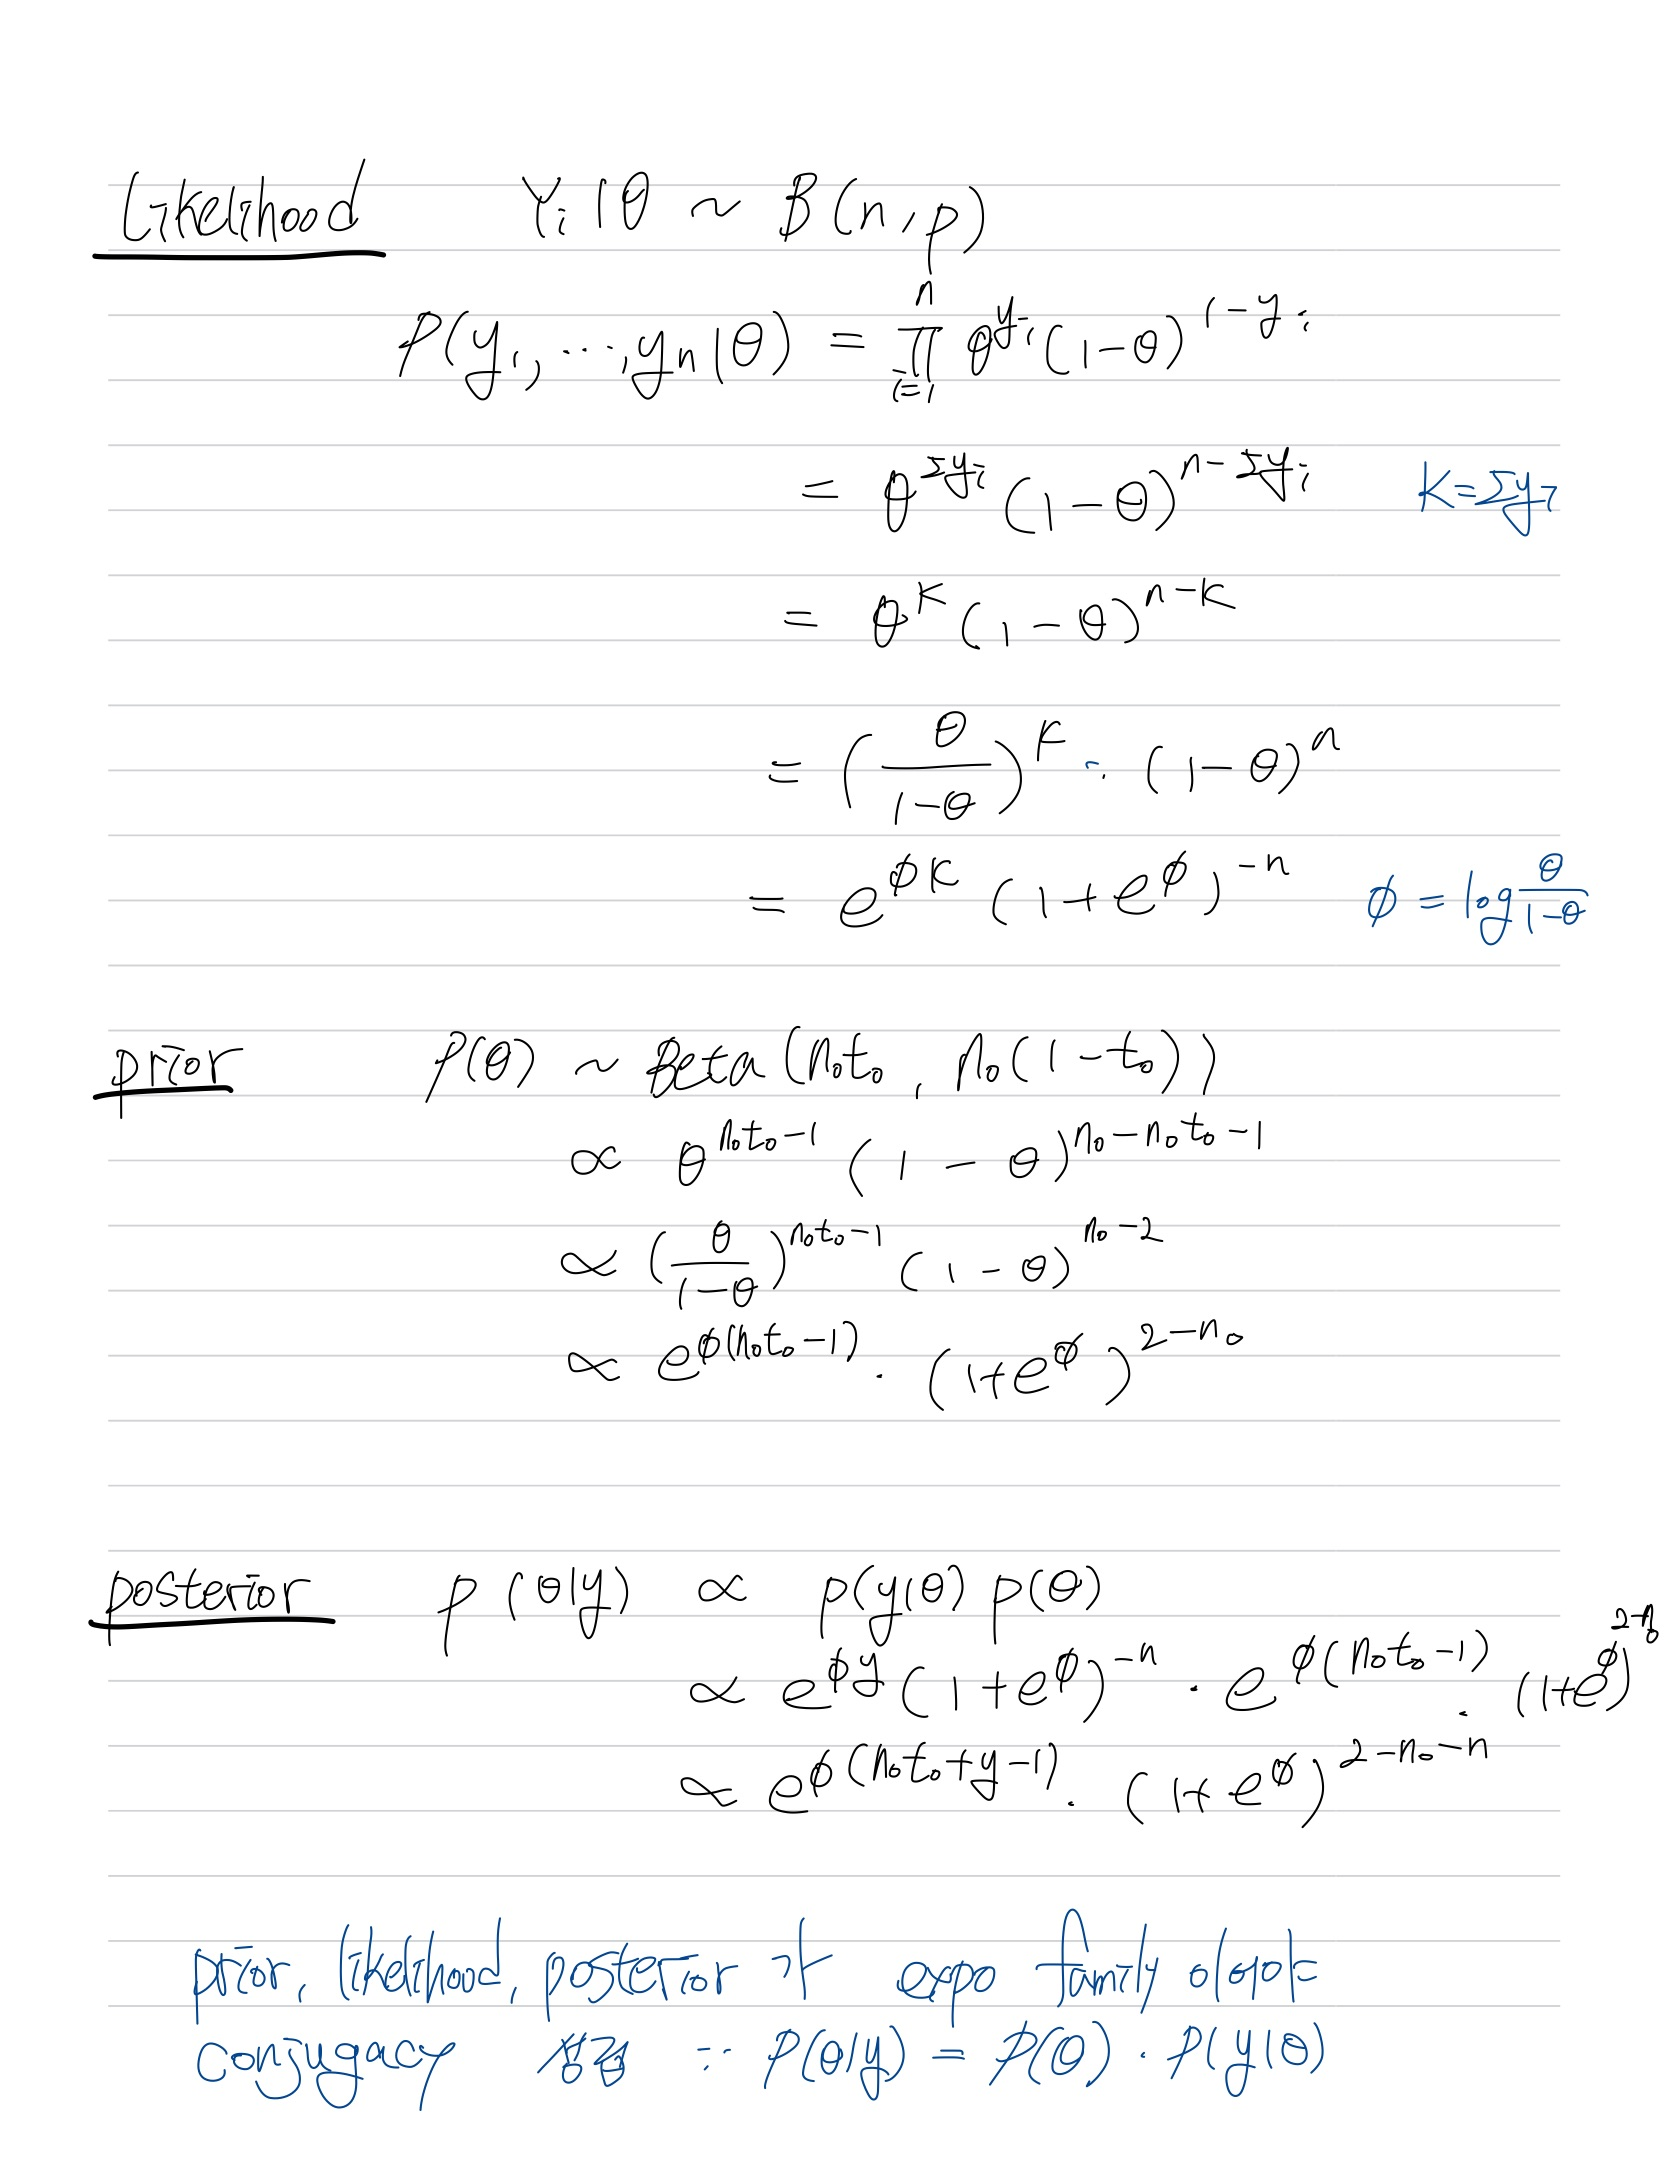

###3번

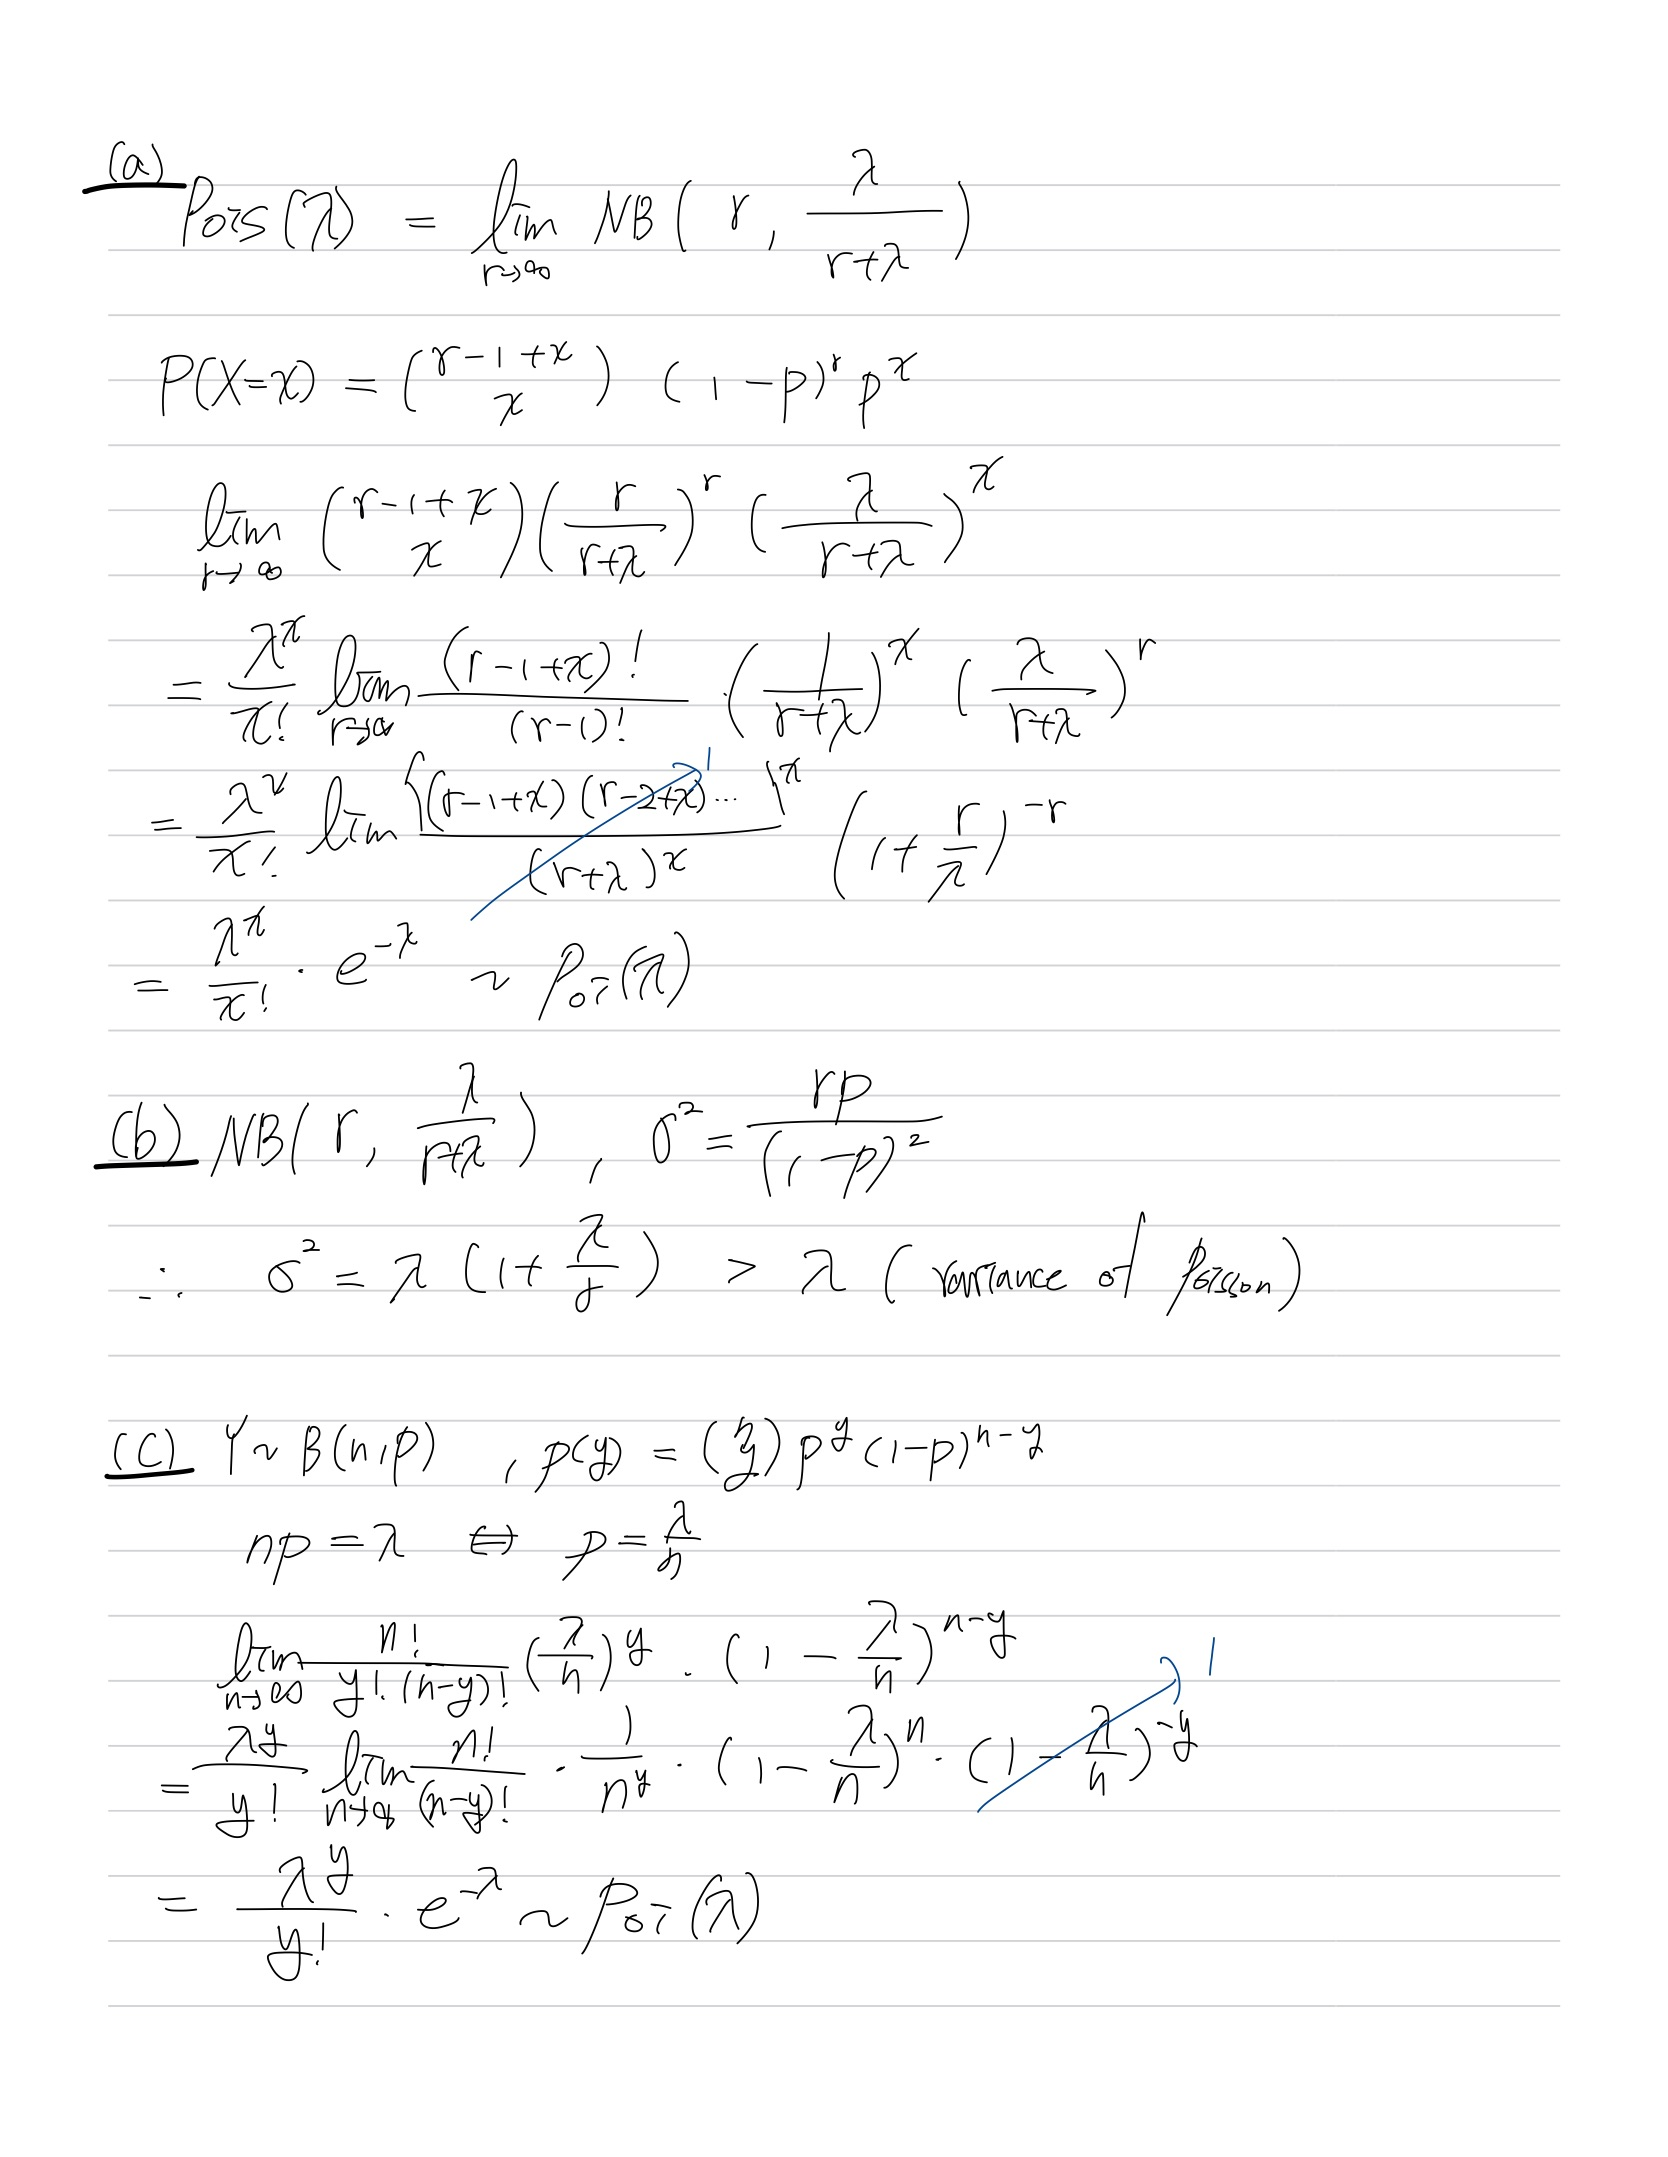